# Import
- https://towardsdatascience.com/clustering-made-easy-with-pycaret-656316c0b080

In [1]:
!pip install --user --upgrade tables
!pip install --user pycaret

In [2]:
# !pip install pycaret[full]==2.3.4
!pip install pycaret

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Install or upgrade required libraries
!pip install pandas scikit-learn

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.clustering import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [6]:
csv_file_path = '/content/drive/MyDrive/MS thesis/HFCAI/rg1-HCFAI.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
df.sort_values(by='HCFAI', ascending=False).head(2)

,ID,barangay_name,city_name,province_name,popden_chi,popden_eld,popden_wom,popden_you,popden_w_1,popden_all,...,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,Neighbors,HCFAI
5048,2974592,Fianza,San Nicolas,Pangasinan,8.173794,8.824771,41.149321,13.736079,20.816993,363.896997,...,0.430949,0.960775,1.0,0,1,1,2960778,17.384668,"2974592, 2973209, 2974591, 2973209, 2974593, 2...",0.654064
2596,2942747,Poblacion (Kimpusa),Suyo,Ilocos Sur,3.143041,2.747063,14.032293,5.296137,6.904777,155.815402,...,0.249932,1.141953,1.0,0,1,1,2928944,31.481358,"2942747, 2941366, 2941365, 2942746, 2942747, 2...",0.651058


In [7]:
for i in df.columns:
  print(i)

ID
barangay_name
city_name
province_name
popden_chi
popden_eld
popden_wom
popden_you
popden_w_1
popden_all
flood_probability_value
rain intensity_value
drought_value
buildability_landcov
RHU_Presence
Road_Presence
POI_Presence
Nearest_RHU
Distance_to_Nearest_RHU_km
Neighbors
HCFAI


# K-means on HCFAI

In [8]:
IDonly = df['ID']
IDdf = IDonly.to_frame()
IDdf

,ID
0,2865422
1,2866789
2,2866790
3,2866791
4,2866795
...,...
5724,2992394
5725,2992395
5726,2992396
5727,2992397


In [9]:
HCIdf = df[['HCFAI']]
# HCIdf = HCIdf.to_frame()
cluster = setup(HCIdf, session_id = 7652)

,Description,Value
0,Session id,7652
1,Original data shape,"(5729, 1)"
2,Transformed data shape,"(5729, 1)"
3,Numeric features,1
4,Rows with missing values,18.1%
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,CPU Jobs,-1


In [11]:
model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6027,16297.8651,0.5181,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

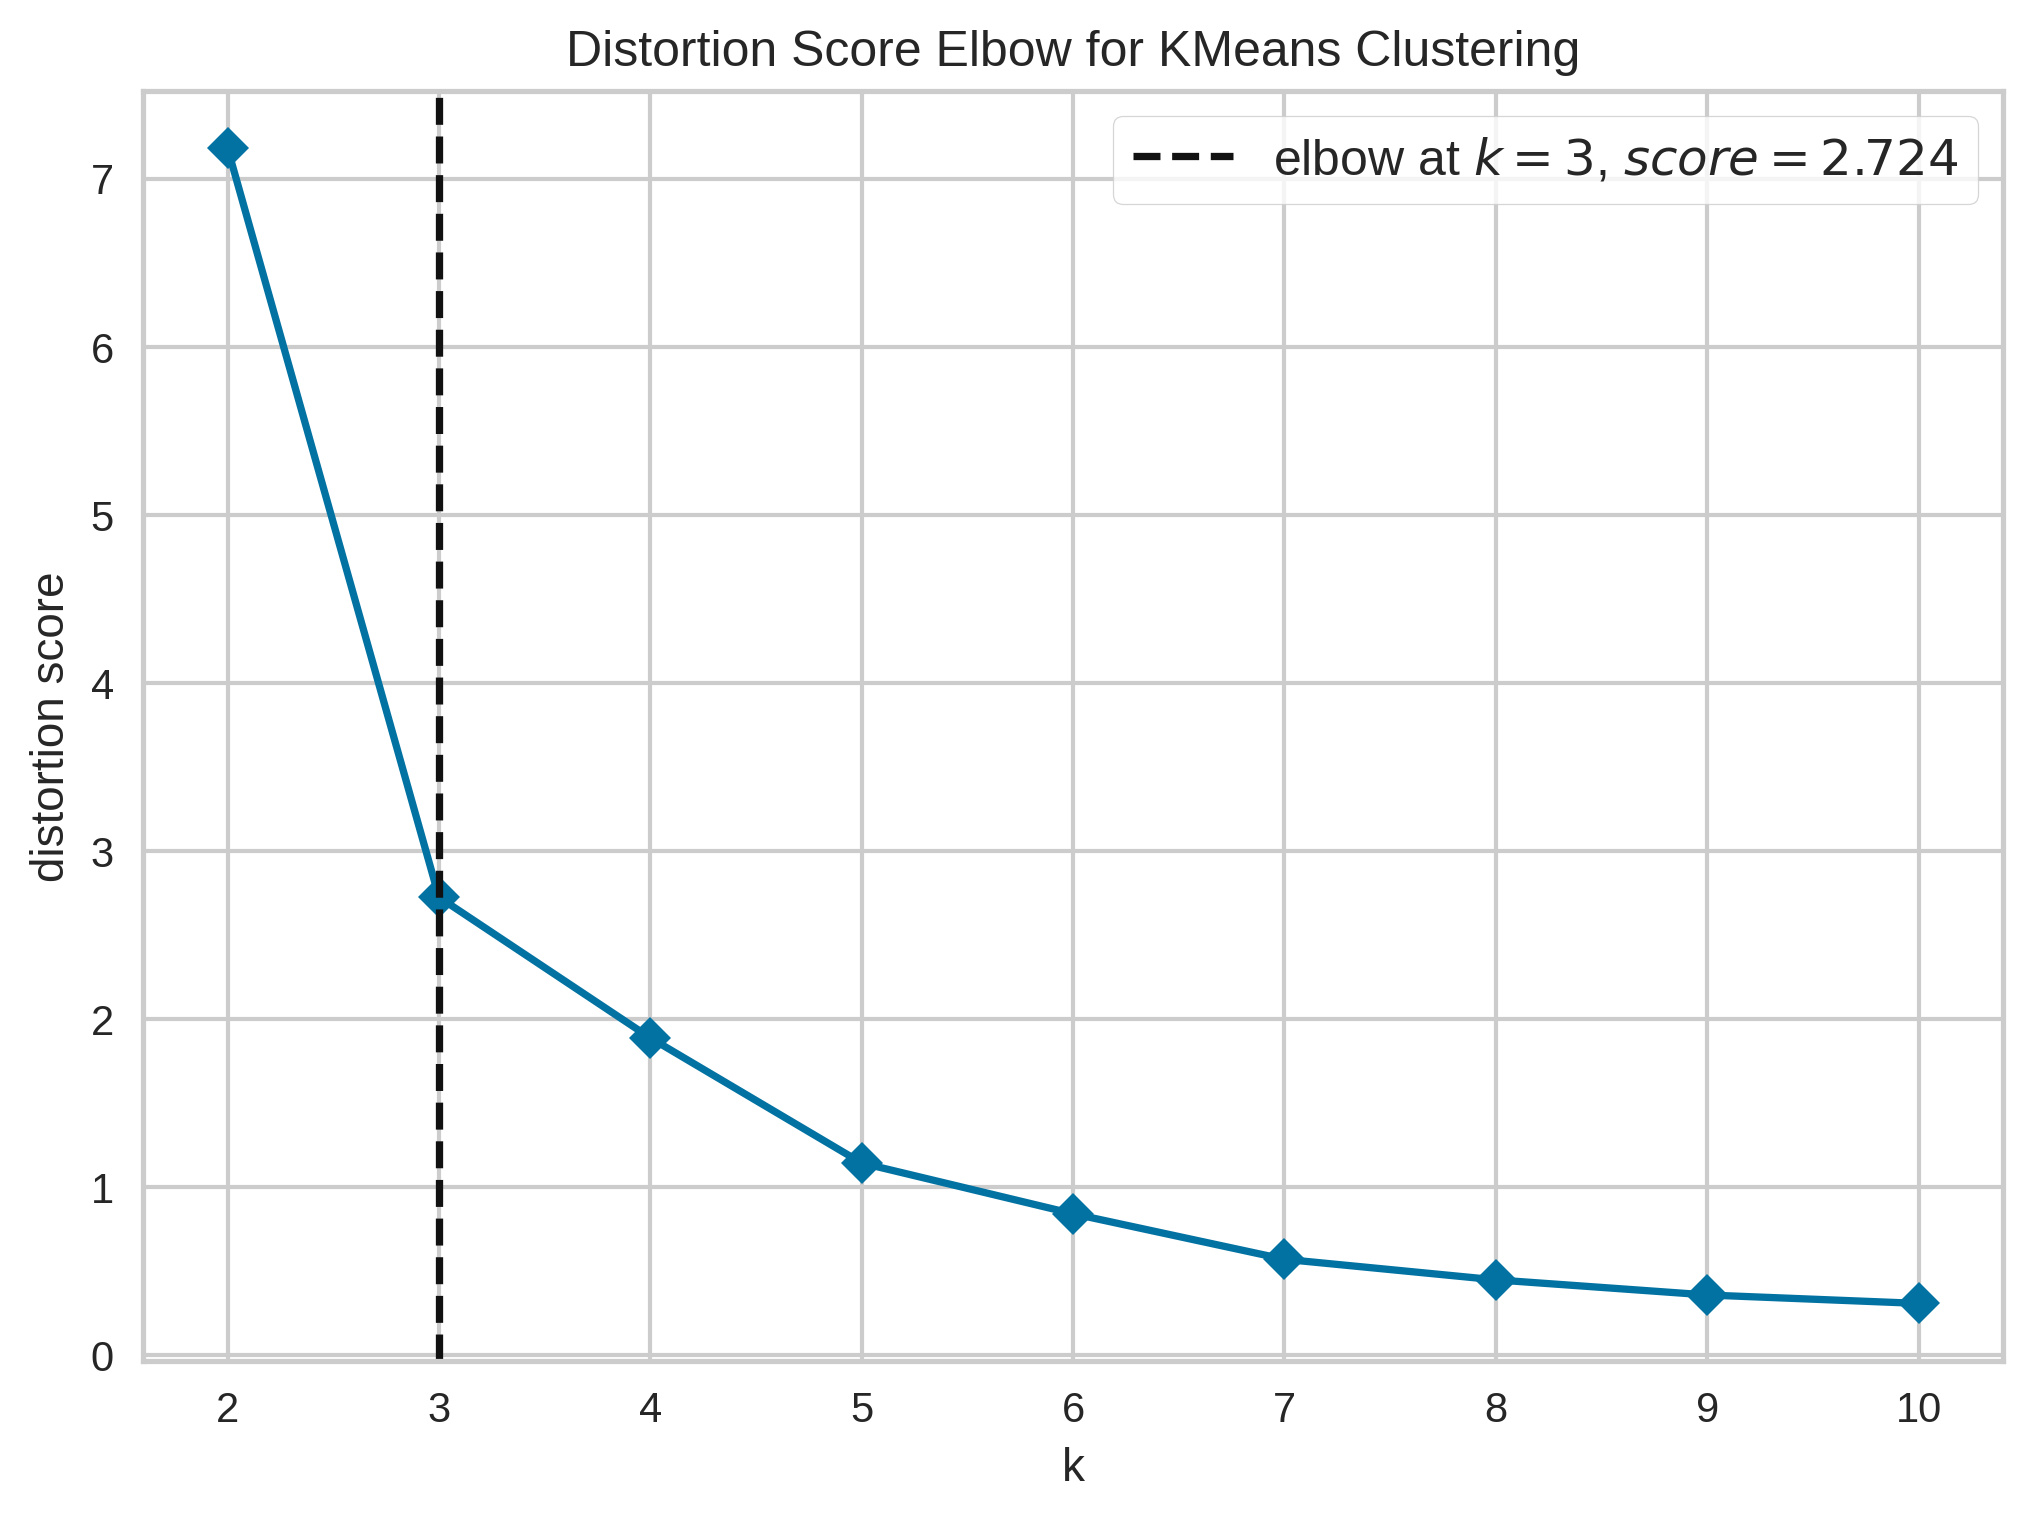

In [12]:
plot_model(model, 'elbow')

### K-means clustering model validation:
1. Intertia score
2. Silhouette score

```
Refer to comments from panel
```



In [13]:
# Evaluate the model
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Apply model on data

In [14]:
model = create_model('kmeans', num_clusters = 3)
plot_model(model,  plot = 'distribution')
# plot_model(model, 'cluster')
save_model(model, 'Region1-HCFAI-Clusters')
HCFAIdf_results = assign_model(model)
HCFAIdf_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6409,16058.1568,0.4358,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,HCFAI,Cluster
0,0.506190,Cluster 0
1,0.514707,Cluster 0
2,0.397823,Cluster 1
3,0.397831,Cluster 1
4,0.421410,Cluster 1
5,0.417061,Cluster 1
6,0.523856,Cluster 0
7,0.501337,Cluster 0
8,0.501333,Cluster 0
9,0.502291,Cluster 0


# Fixing df for BPNN to find candidate locations

In [15]:
HCFAIdf_results

,HCFAI,Cluster
0,0.506190,Cluster 0
1,0.514707,Cluster 0
2,0.397823,Cluster 1
3,0.397831,Cluster 1
4,0.421410,Cluster 1
...,...,...
5724,0.545943,Cluster 2
5725,0.545943,Cluster 2
5726,0.576700,Cluster 2
5727,0.529749,Cluster 0


In [16]:
HCFAIdf_results.rename(columns={'Cluster': 'Accessibility Level'}, inplace=True)

lists = {}

for cluster_number in range(3):  # Assuming you have 3 clusters
    cluster_name = f"Cluster {cluster_number}"
    cluster_list = HCFAIdf_results.loc[HCFAIdf_results['Accessibility Level'] == cluster_name, 'HCFAI'].tolist()
    lists[cluster_name] = cluster_list

In [17]:
for cluster_name, cluster_list in lists.items():
    print(f"Cluster {cluster_name}: {cluster_list}")
    print(f"max, min, total {max(cluster_list)} | {min(cluster_list)} | {len(cluster_list)}")

Cluster Cluster 0: [0.5061903595924377, 0.5147069692611694, 0.5238559246063232, 0.5013369917869568, 0.5013332962989807, 0.5022910237312317, 0.5022909641265869, 0.5018356442451477, 0.5061840415000916, 0.5044779181480408, 0.505607545375824, 0.5119792819023132, nan, 0.5179799795150757, 0.516345739364624, 0.514701247215271, 0.5232576131820679, 0.5010687112808228, 0.5021655559539795, 0.5017683506011963, 0.500488817691803, 0.5006798505783081, 0.5025634765625, 0.5060579776763916, 0.5061854720115662, 0.5118895769119263, 0.5119123458862305, 0.5119792819023132, nan, 0.4741455316543579, 0.5198624134063721, 0.47048816084861755, 0.4846862554550171, 0.5261698365211487, 0.5012311339378357, 0.5009698271751404, 0.5006750822067261, 0.5006746649742126, 0.5006807446479797, 0.5025618672370911, 0.5025634765625, 0.502533495426178, 0.5140366554260254, 0.5101063847541809, 0.5227689146995544, 0.47255024313926697, 0.4697170853614807, 0.5133630633354187, 0.4846700131893158, 0.4846700131893158, 0.49363818764686584

In [35]:
x = HCFAIdf_results['HCFAI'].notna() # removing nan values
x = HCFAIdf_results[x]
x.sort_values(by='HCFAI', ascending=False)

,HCFAI,Accessibility Level
5048,0.654064,Cluster 2
2596,0.651058,Cluster 2
1121,0.650529,Cluster 2
5267,0.645940,Cluster 2
5194,0.645939,Cluster 2
...,...,...
4115,0.338558,Cluster 1
4306,0.338244,Cluster 1
4400,0.338217,Cluster 1
4413,0.338007,Cluster 1


In [36]:
x = x.replace(['Cluster 0'],int(0))
x = x.replace(['Cluster 1'],int(0))
x = x.replace(['Cluster 2'],int(1))

In [37]:
x['ID'] = IDdf
x

,HCFAI,Accessibility Level,ID
0,0.506190,0,2865422
1,0.514707,0,2866789
2,0.397823,0,2866790
3,0.397831,0,2866791
4,0.421410,0,2866795
...,...,...,...
5724,0.545943,1,2992394
5725,0.545943,1,2992395
5726,0.576700,1,2992396
5727,0.529749,0,2992397


In [39]:
df = df.merge(x, how='left', on='ID')
df = df.drop_duplicates('ID')
df = df.drop(['Accessibility Level_x','Accessibility Level_y'], axis=1)
df

,ID,barangay_name,city_name,province_name,popden_chi,popden_eld,popden_wom,popden_you,popden_w_1,popden_all,...,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,Neighbors,HCFAI_x,HCFAI_y,Accessibility Level
0,2865422,Ilio-ilio (Iliw-iliw),Burgos,Pangasinan,0.000000,0.000000,0.000000,0.000000,0.000000,31.231658,...,1.0,0,0,0,2877844,29.847534,"2865422, 2866804",0.506190,0.506190,0.0
1,2866789,Macaboboni,Agno,Pangasinan,1.147061,0.556495,4.096106,1.518058,2.013981,130.432307,...,1.0,0,0,0,2877844,11.042224,"2866789, 2866790",0.514707,0.514707,0.0
2,2866790,Macaboboni,Agno,Pangasinan,0.000000,0.000000,0.000000,0.000000,0.000000,216.666771,...,0.0,0,0,0,2877844,11.392127,"2866790, 2866791",0.397823,0.397823,0.0
3,2866791,Macaboboni,Agno,Pangasinan,0.000000,0.000000,0.000000,0.000000,0.000000,326.184778,...,0.0,0,0,0,2877844,12.122822,2866791,0.397831,0.397831,0.0
4,2866795,Aloleng,Agno,Pangasinan,8.135755,5.317485,31.904920,11.086960,14.915550,57.582954,...,0.0,0,0,1,2877844,15.836811,2866795,0.421410,0.421410,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,2992394,Pasaleng,Pagudpud,Ilocos Norte,0.000000,0.000000,0.000000,0.000000,0.000000,16.540533,...,1.0,0,0,1,2971664,20.940640,2992394,0.545943,0.545943,1.0
5725,2992395,Pasaleng,Pagudpud,Ilocos Norte,0.000000,0.000000,0.000000,0.000000,0.000000,9.480127,...,1.0,0,0,1,2971664,20.940735,"2992395, 2991013, 2992394",0.545943,0.545943,1.0
5726,2992396,Adams (Pob.),Adams,Ilocos Norte,0.000000,0.000000,0.000000,0.000000,0.000000,6.607602,...,1.0,0,0,1,2971664,21.033190,"2992396, 2991014, 2992396, 2991014, 2992395",0.576700,0.576700,1.0
5727,2992397,Adams (Pob.),Adams,Ilocos Norte,0.000000,0.000000,0.000000,0.000000,0.000000,0.943759,...,1.0,0,0,0,2971664,21.185258,"2992397, 2991015",0.529749,0.529749,0.0


In [40]:
df.rename(columns = {'Accessibility Level':'Cluster', 'HCFAI_y': 'HCFAI'}, inplace = True)
df[df['Cluster'] == 1]
df

,ID,barangay_name,city_name,province_name,popden_chi,popden_eld,popden_wom,popden_you,popden_w_1,popden_all,...,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,Neighbors,HCFAI_x,HCFAI,Cluster
0,2865422,Ilio-ilio (Iliw-iliw),Burgos,Pangasinan,0.000000,0.000000,0.000000,0.000000,0.000000,31.231658,...,1.0,0,0,0,2877844,29.847534,"2865422, 2866804",0.506190,0.506190,0.0
1,2866789,Macaboboni,Agno,Pangasinan,1.147061,0.556495,4.096106,1.518058,2.013981,130.432307,...,1.0,0,0,0,2877844,11.042224,"2866789, 2866790",0.514707,0.514707,0.0
2,2866790,Macaboboni,Agno,Pangasinan,0.000000,0.000000,0.000000,0.000000,0.000000,216.666771,...,0.0,0,0,0,2877844,11.392127,"2866790, 2866791",0.397823,0.397823,0.0
3,2866791,Macaboboni,Agno,Pangasinan,0.000000,0.000000,0.000000,0.000000,0.000000,326.184778,...,0.0,0,0,0,2877844,12.122822,2866791,0.397831,0.397831,0.0
4,2866795,Aloleng,Agno,Pangasinan,8.135755,5.317485,31.904920,11.086960,14.915550,57.582954,...,0.0,0,0,1,2877844,15.836811,2866795,0.421410,0.421410,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,2992394,Pasaleng,Pagudpud,Ilocos Norte,0.000000,0.000000,0.000000,0.000000,0.000000,16.540533,...,1.0,0,0,1,2971664,20.940640,2992394,0.545943,0.545943,1.0
5725,2992395,Pasaleng,Pagudpud,Ilocos Norte,0.000000,0.000000,0.000000,0.000000,0.000000,9.480127,...,1.0,0,0,1,2971664,20.940735,"2992395, 2991013, 2992394",0.545943,0.545943,1.0
5726,2992396,Adams (Pob.),Adams,Ilocos Norte,0.000000,0.000000,0.000000,0.000000,0.000000,6.607602,...,1.0,0,0,1,2971664,21.033190,"2992396, 2991014, 2992396, 2991014, 2992395",0.576700,0.576700,1.0
5727,2992397,Adams (Pob.),Adams,Ilocos Norte,0.000000,0.000000,0.000000,0.000000,0.000000,0.943759,...,1.0,0,0,0,2971664,21.185258,"2992397, 2991015",0.529749,0.529749,0.0


In [41]:
df = df.drop(['HCFAI_x'], axis=1)
df.to_csv(r'/content/drive/MyDrive/MS thesis/preliminary site selection/rg1-clusters.csv')

# Clustering using all region 1 data

,Description,Value
0,Session id,7652
1,Original data shape,"(4701, 22)"
2,Transformed data shape,"(4701, 6041)"
3,Numeric features,18
4,Categorical features,4
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6990,9670.7545,0.5602,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

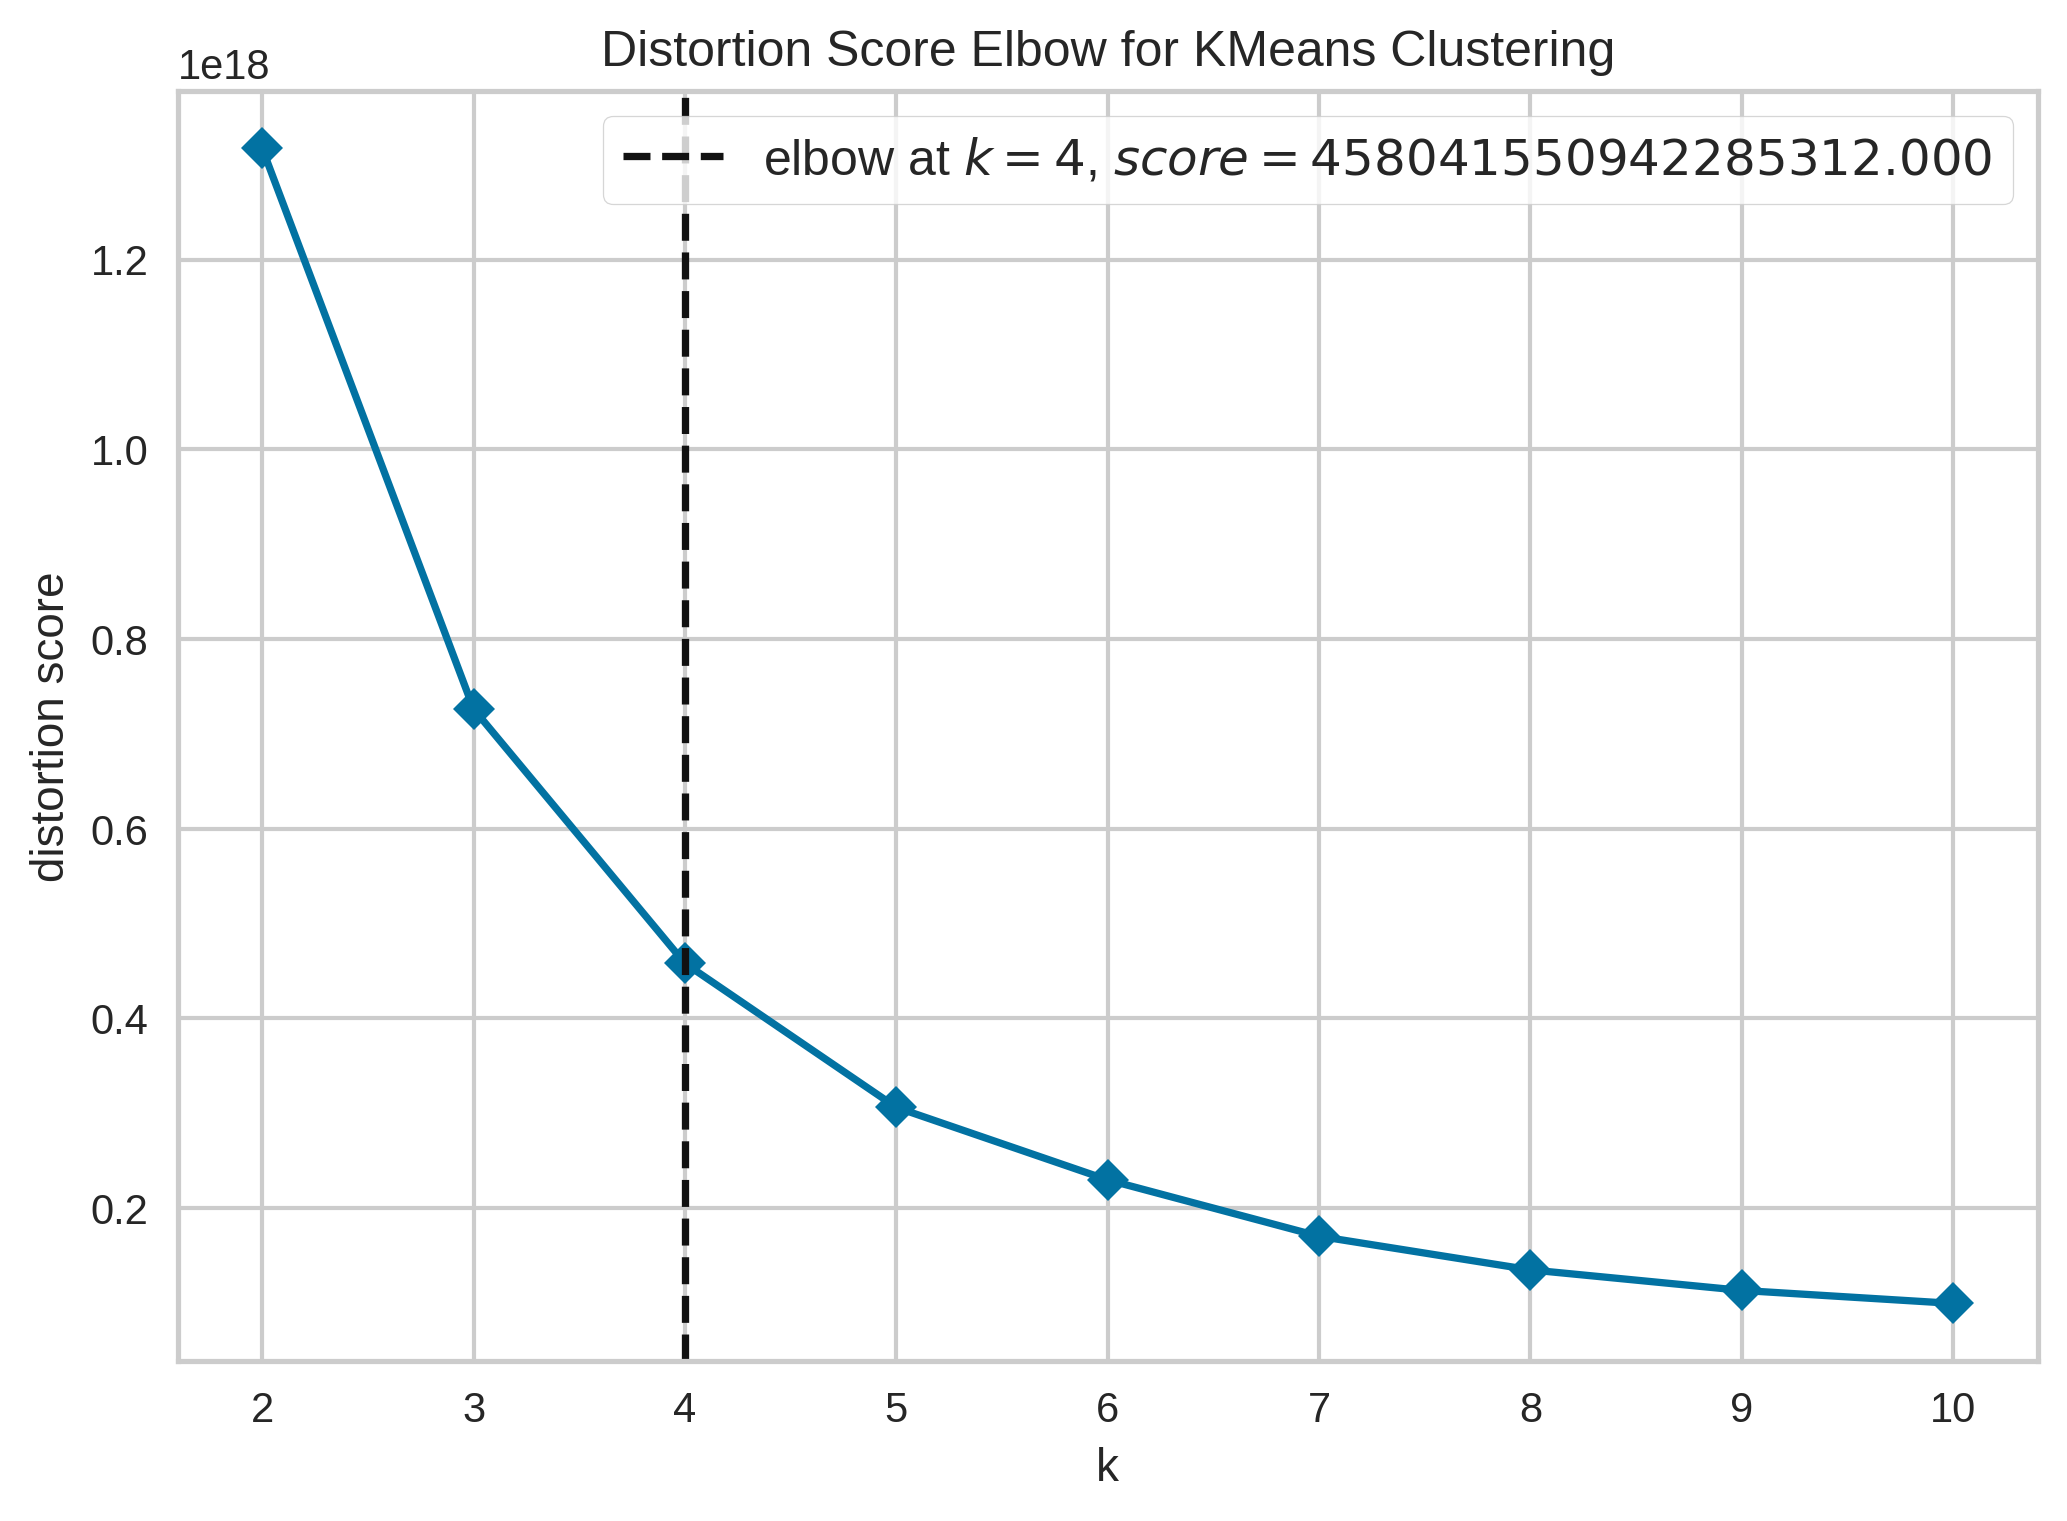

In [ ]:
cluster = setup(df, session_id = 7652)
model = create_model('kmeans')
plot_model(model, 'elbow')

In [ ]:
model = create_model('kmeans', num_clusters = 4)
plot_model(model,  plot = 'distribution')
plot_model(model, 'cluster')
save_model(model, 'Region1-Clusters')
rg1_results = assign_model(model)
rg1_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6990,9670.7545,0.5602,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Distance_to_Nearest_RHU_km,population_children_under5,population_elder60plus,population_women,population_youth,population_reproductive_women,popden_all_total_population,Neighbors,HCFAI,Cluster
0,2865422,Ilio-ilio (Iliw-iliw),Burgos,Pangasinan,0.934144,1.178482,0.740358,1.0,0,0,...,29.847534,0.000000,0.000000,0.00000,0.000000,0.000000,4.064488e+05,"2944105, 2944105, 2945487, 2944106, 2945487, 2...",0.500010,Cluster 0
1,2866789,Macaboboni,Agno,Pangasinan,0.734487,1.099466,0.749863,1.0,0,0,...,11.042224,14927.853516,7242.223145,53306.71875,19756.001953,26209.955078,1.697446e+06,"2944105, 2945487, 2944106, 2945487, 2944107, 2...",0.500016,Cluster 0
2,2866790,Macaboboni,Agno,Pangasinan,0.734487,1.099466,0.749863,0.0,0,0,...,11.392127,0.000000,0.000000,0.00000,0.000000,0.000000,2.819701e+06,"2942723, 2942723, 2941342, 2942722, 2941341, 2...",0.499935,Cluster 0
3,2866791,Macaboboni,Agno,Pangasinan,0.734487,1.099466,0.749863,0.0,0,0,...,12.122822,0.000000,0.000000,0.00000,0.000000,0.000000,4.244968e+06,"2956481, 2956481, 2956481, 2956481, 2956481, 2...",0.499960,Cluster 0
4,2866795,Aloleng,Agno,Pangasinan,1.089602,1.154037,0.779155,0.0,0,0,...,15.836811,105878.718750,69201.750000,415210.62500,144285.703125,194110.968750,7.493846e+05,"2956481, 2956481, 2956481, 2956481, 2957864, 2...",0.499835,Cluster 0
5,2866796,Magsaysay,Agno,Pangasinan,0.700863,1.151206,0.800627,0.0,0,0,...,16.685263,0.000000,0.000000,0.00000,0.000000,0.000000,4.021250e+03,"2956481, 2956481, 2956481, 2957864, 2956482, 2...",0.467737,Cluster 0
6,2866797,Tupa,Agno,Pangasinan,0.952087,1.147433,0.793311,1.0,0,0,...,18.265360,0.000000,0.000000,0.00000,0.000000,0.000000,1.469673e+05,"2971765, 2971764, 2971766, 2970382, 2970383, 2...",0.499971,Cluster 0
7,2866798,Gayusan,Agno,Pangasinan,0.853295,1.143231,0.787825,1.0,0,0,...,20.012033,119328.359375,152214.093750,540266.06250,167247.546875,236777.453125,1.637830e+06,"2971764, 2970382, 2970381, 2971764, 2970381, 2...",0.500001,Cluster 0
8,2866799,Gayusan,Agno,Pangasinan,0.853295,1.143231,0.787825,0.0,0,0,...,21.284109,0.000000,0.000000,0.00000,0.000000,0.000000,3.716372e+06,"2971766, 2971767, 2970383, 2970384",0.499971,Cluster 0
9,2866800,Baruan,Agno,Pangasinan,0.926651,1.173055,0.762978,0.0,0,0,...,22.080393,0.000000,0.000000,0.00000,0.000000,0.000000,8.700532e+05,"2971767, 2971768, 2970384, 2970385",0.499882,Cluster 0


In [ ]:
rg1_results.rename(columns = {'Cluster':'Accessibility Level'}, inplace = True)
low = []
midlow = []
midhigh = []
high = []

for x in range(5729):
    if rg1_results['Accessibility Level'][x] == "Cluster 0":
        midlow.append(rg1_results["HCFAI"][x])
    elif rg1_results['Accessibility Level'][x] == "Cluster 1":
        low.append(rg1_results["HCFAI"][x])
    elif rg1_results['Accessibility Level'][x] == "Cluster 2":
        high.append(rg1_results["HCFAI"][x])
    elif rg1_results['Accessibility Level'][x] == "Cluster 3":
        midhigh.append(rg1_results["HCFAI"][x])

KeyError: 4701

In [ ]:
print(f'CLUSTER 1 - Max: {max(low)} min: {min(low)} total number: {len(low)}')
print(f'CLUSTER 0 - Max: {max(midlow)} min: {min(midlow)} total number: {len(midlow)}')
print(f'CLUSTER 2 - Max: {max(high)} min: {min(high)} total number: {len(high)}')
print(f'CLUSTER 3 - Max: {max(midhigh)} min: {min(midhigh)} total number: {len(midhigh)}')

In [ ]:
mid_to_high = []
for i in list(df['HCFAI']):
    if i >= 0.53:
        mid_to_high.append(i)

# Assuming original_df is your original DataFrame
filtered_original_df = df[df['HCFAI'].isin(mid_to_high)]
print(filtered_original_df)